In [1]:
!pip install joblib
!pip install scikit-learn
!pip install scipy
!pip install nltk
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.tree import DecisionTreeClassifier

In [2]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [94]:
df1 = pd.read_csv('data/train.csv')
df2 = pd.read_csv('data/True.csv')
df3 = pd.read_csv('data/Fake.csv')

df2['label'] = 0
df3['label'] = 1

In [67]:
print("df1 rows = ", df1.index)
print("df1 nulls = ", df1.isnull().sum())
print("df2 nulls = ", df2.isnull().sum())
print("df3 nulls = ", df3.isnull().sum())


df1 rows =  RangeIndex(start=0, stop=20800, step=1)
df1 nulls =  id           0
title      558
author    1957
text        39
label        0
dtype: int64
df2 nulls =  title      0
text       0
subject    0
date       0
label      0
dtype: int64
df3 nulls =  title      0
text       0
subject    0
date       0
dtype: int64


In [10]:
df1.dropna(inplace=True)
print("df1 rows = ", df1.index)
print("df1 nulls = ", df1.isnull().sum())

df1 rows =  Index([    0,     1,     2,     3,     4,     5,     7,     9,    10,    11,
       ...
       20790, 20791, 20792, 20793, 20794, 20795, 20796, 20797, 20798, 20799],
      dtype='int64', length=18285)
df1 nulls =  id        0
title     0
author    0
text      0
label     0
dtype: int64


label     0  1
subject       
News      3  2
Politics  1  1


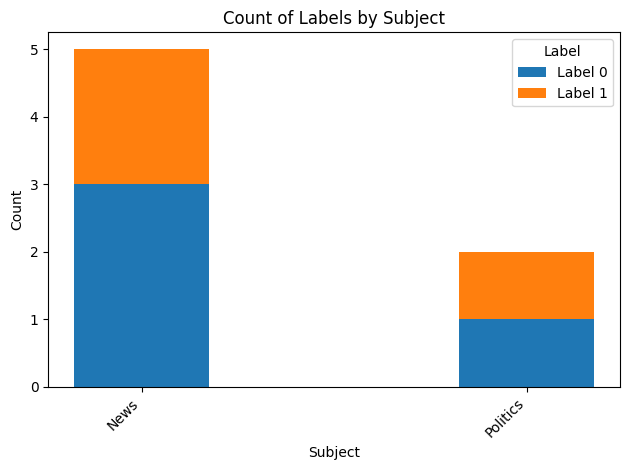

In [79]:
# Anolise exploratoria - test de alg 1

data = {
    'title': ["Donald Trump Sends Out Embarrassing New Year’...",
              "Drunk Bragging Trump Staffer Started Russian ...",
              "Sheriff David Clarke Becomes An Internet Joke...",
              "Trump Is So Obsessed He Even Has Obama’s Name...",
              "Pope Francis Just Called Out Donald Trump Dur...",
              "Another Article Title", "Yet Another Title"],
    'text': ["Donald Trump just couldn t wish all Americans ...",
             "House Intelligence Committee Chairman Devin Nu...",
             "On Friday, it was revealed that former Milwauk...",
             "On Christmas day, Donald Trump announced that ...",
             "Pope Francis used his annual Christmas Day mes...",
             "Some Text Here", "More Text Here"],
    'subject': ["News", "News", "News", "News", "News", "Politics", "Politics"],
    'date': ["December 31, 2017", "December 31, 2017", "December 30, 2017", "December 29, 2017", "December 25, 2017",
             "January 1, 2018", "January 2, 2018"],
    'label': [0, 0, 0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Grouping by subject and label, then getting the count
grouped = df.groupby(['subject', 'label']).size().unstack(fill_value=0)

print(grouped)

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(grouped.index))
width = 0.35

ax.bar(x, grouped[0], width, label='Label 0')
ax.bar(x, grouped[1], width, bottom=grouped[0], label='Label 1')

ax.set_title('Count of Labels by Subject')
ax.set_xlabel('Subject')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45, ha='right')
ax.legend(title='Label')

plt.tight_layout()
plt.show()

label                0     1
subject                     
Government News      0  1570
Middle-east          0   778
News                 0  9050
US_News              0   783
left-news            0  4459
politics             0  6841
politicsNews     11272     0
worldnews        10145     0


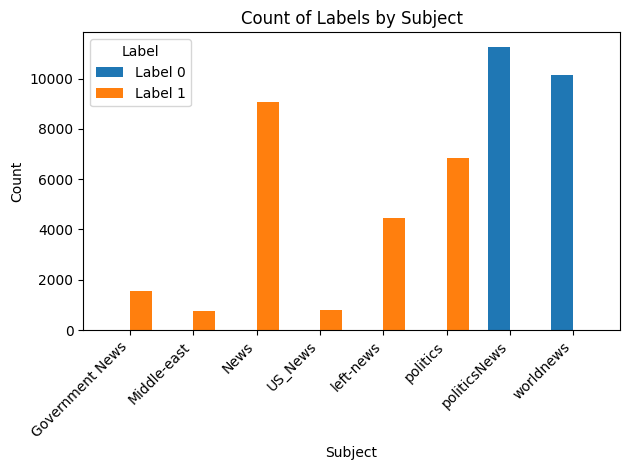

In [78]:
# ANALISE EXPLORATORIA - prova real falha 1
dafrs = [df2, df3]
plot_data = pd.concat(dafrs, ignore_index=True)
plot_data
grouped = plot_data.groupby(['subject', 'label']).size().unstack(fill_value=0)

print(grouped)

# Plotting
fig, ax = plt.subplots()

# Check if the label columns exist in the grouped DataFrame
if 0 in grouped.columns and 1 in grouped.columns:
    x = np.arange(len(grouped.index))
    width = 0.35
    ax.bar(x - width/2, grouped[0], width, label='Label 0')  # Shift bars to the left
    ax.bar(x + width/2, grouped[1], width, label='Label 1')  # Shift bars to the right
else:
    # Handle the case where one or both of the label columns are missing
    print("Error: One or both label columns are missing in the grouped DataFrame.")

ax.set_title('Count of Labels by Subject')
ax.set_xlabel('Subject')
ax.set_ylabel('Count')
ax.set_xticks(range(len(grouped.index)))
ax.set_xticklabels(grouped.index, rotation=45, ha='right')
ax.legend(title='Label')

plt.tight_layout()
plt.show()

In [88]:
df2['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [89]:
df3['subject'].unique()


array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [90]:
df2.shape[0]

21417

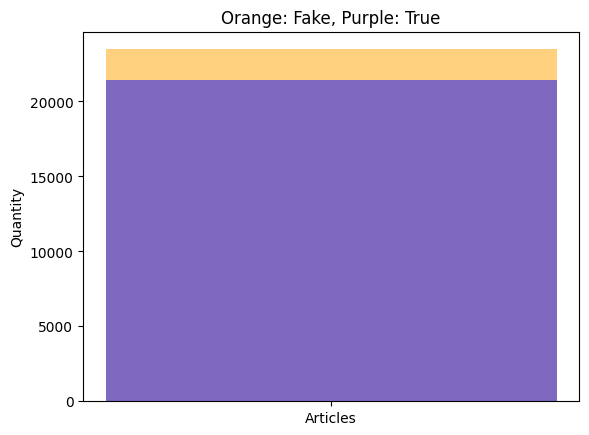

In [93]:
# A VERDADEIRA ANALISE ( eh o maximo q deu T-T )
x_label = 'Articles'
y1 = df3.shape[0]
y2 = df2.shape[0]

fig, ax = plt.subplots()

ax.bar(x_label, y1, color='orange', alpha=0.5)

ax.bar(x_label, y2, color='blue', alpha=0.5)

ax.set_title('Orange: Fake, Purple: True')
ax.set_ylabel('Quantity')

plt.show()

In [11]:
df1.drop('id', axis=1, inplace=True)
df1['label'] = df1['label'].astype(int)
df2['label'] = df2['label'].astype(int)
df2['label'] = df3['label'].astype(int)


In [12]:
df1.drop('author', axis=1, inplace=True)
df2.drop(columns=['subject', 'date'], axis=1, inplace=True)
df3.drop(columns=['subject', 'date'], axis=1, inplace=True)

dfs = [df1, df2, df3]
df = pd.concat(dfs)

In [13]:
df['all'] = df['title'] + ' ' + df['text']

In [14]:
# Como achar contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  text = text.lower()
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub("\\W", "", text)
  text = re.sub("https?://\S+|www.\.\S+", "", text)
  text = re.sub("<.*?>+", "", text)
  text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
  text = re.sub("\n", "", text)
  text = re.sub("\w*\d\w*", "", text)
  return text

# O q realmente funcionou KK
porter_stemmer = PorterStemmer()
def tokenizer(df):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", df).lower().split()
    words = [porter_stemmer.stem(word) for word in words if not words in stopwords]
    words = ' '.join(words)
    return words

In [12]:
df.head()
# df1['text'] = df1['text'].apply(lambda x: x.lower())
# df2['text'] = df2['text'].apply(lambda x: x.lower())
# df3['text'] = df3['text'].apply(lambda x: x.lower())

# df1['text'] = df1['text'].apply(lambda x: expand_contractions(x))
# df2['text'] = df2['text'].apply(lambda x: expand_contractions(x))
# df3['text'] = df3['text'].apply(lambda x: expand_contractions(x))

# df1['text'] = df1['text'].apply(wordopt)
# df2['text'] = df2['text'].apply(wordopt)
# df3['text'] = df3['text'].apply(wordopt)

,title,text,label,all
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Print \r\nAn Iranian woman has been sentenced ...,1,Iranian woman jailed for fictional unpublished...


In [15]:
df['feature'] = df['all'].apply(tokenizer)

In [11]:
print(df['feature'])

0        hous dem aid we didn t even see comey s letter...
1        flynn hillari clinton big woman on campu - bre...
2        whi the truth might get you fire whi the truth...
3        15 civilian kill in singl us airstrik have bee...
4        iranian woman jail for fiction unpublish stori...
                               ...                        
23476    mcpain john mccain furiou that iran treat us s...
23477    justic yahoo settl e-mail privaci class-act 4m...
23478    sunnistan us and alli safe zone plan to take t...
23479    how to blow 700 million al jazeera america fin...
23480    10 u s navi sailor held by iranian militari si...
Name: feature, Length: 63183, dtype: object


In [23]:
#MODELOS HOLY MOLY
Y = df['label'].values
X = df['feature'].values
X

array(['hous dem aid we didn t even see comey s letter until jason chaffetz tweet it hous dem aid we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu on octob 30 2016 subscrib jason chaffetz on the stump in american fork utah imag courtesi michael jolley avail under a creativ commons-bi licens with apolog to keith olbermann there is no doubt who the worst person in the world is thi week fbi director jame comey but accord to a hous democrat aid it look like we also know who the second-worst person is as well it turn out that when comey sent hi now-infam letter announc that the fbi wa look into email that may be relat to hillari clinton s email server the rank democrat on the relev committe didn t hear about it from comey they found out via a tweet from one of the republican committe chairmen as we now know comey notifi the republican chairmen and democrat rank member of the hous intellig judiciari and oversight committe that hi agenc wa review email it had rec

In [24]:
vectonizer = TfidfVectorizer()
vectonizer.fit(X)
print(X)

dump(vectonizer, 'models/vectonizer')

['hous dem aid we didn t even see comey s letter until jason chaffetz tweet it hous dem aid we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu on octob 30 2016 subscrib jason chaffetz on the stump in american fork utah imag courtesi michael jolley avail under a creativ commons-bi licens with apolog to keith olbermann there is no doubt who the worst person in the world is thi week fbi director jame comey but accord to a hous democrat aid it look like we also know who the second-worst person is as well it turn out that when comey sent hi now-infam letter announc that the fbi wa look into email that may be relat to hillari clinton s email server the rank democrat on the relev committe didn t hear about it from comey they found out via a tweet from one of the republican committe chairmen as we now know comey notifi the republican chairmen and democrat rank member of the hous intellig judiciari and oversight committe that hi agenc wa review email it had recent di

['models/vectonizer']

In [25]:
vectonizer

TfidfVectorizer()

In [19]:
vectonizer = TfidfVectorizer()
vectonizer.fit(X)
X = vectonizer.transform(X)

In [20]:
X

<63183x164052 sparse matrix of type '<class 'numpy.float64'>'
	with 14937212 stored elements in Compressed Sparse Row format>

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=42)

In [18]:
#TOMA ESSE LEARNING
SVC = GridSearchCV(
    svm.SVC(),
    {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': list(map(lambda x: x, range(1, 10))),
    'gamma' : ['auto', 'scale'],
    'degree': list(map(lambda x: x, range(1, 5)))
    # 'tol': list(map(lambda x: 1e-x, range(1, 5)))
    },
    n_jobs = 8
)

In [19]:
# a = svm.SVC().fit(X_train, Y_train)
# # print(SVC.best_params_)

# # SVC = SVC.best_estimator_
# Ypred = a.predict(X)
# print(mean_absolute_error(Y, Ypred))

In [33]:
#LOGISTIC REGRESSION SAVES THE COMPETITION

lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train, Y_train)
dump(lr, 'models/LogisticRegression.pkl')

['models/LogisticRegression.pkl']

In [36]:
pred = lr.predict(X_test)
pred

array([1, 1, 0, ..., 0, 1, 1])

In [35]:
acc = accuracy_score(Y_test, pred)
prec = precision_score(Y_test, pred)
prec

0.9607801568793725

In [40]:
DTC = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(map(lambda x: x * 10, range(1, 4))),
    'min_samples_split' : list(map(lambda x: x, range(2, 10))),
    },
    n_jobs = -1
)

In [41]:
DTC.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [45]:
DTC.best_params_
DTC.best_score_

0.9667070105204356

In [51]:
model = DTC.best_estimator_
dump(model, "models/DTC.pkl")

DecisionTreeClassifier(max_depth=20, random_state=42)

In [48]:
DTC_pred = model.predict(X_test)

In [50]:
acc = accuracy_score(Y_test, DTC_pred)
prec = precision_score(Y_test, DTC_pred)
prec

0.9618608549874267

In [54]:
X_test

<9478x164052 sparse matrix of type '<class 'numpy.float64'>'
	with 2229724 stored elements in Compressed Sparse Row format>

In [53]:
print(X_test)

  (0, 161295)	0.046246398780685295
  (0, 159822)	0.23722800569693123
  (0, 159678)	0.03992812904529642
  (0, 158948)	0.02147686133956979
  (0, 158480)	0.04002826759044884
  (0, 158456)	0.014371955385099121
  (0, 158230)	0.03511490544686652
  (0, 158092)	0.025600563243808314
  (0, 157917)	0.03773228803561928
  (0, 157876)	0.020253653261056295
  (0, 157868)	0.031096437656479646
  (0, 157112)	0.039978750306516604
  (0, 156940)	0.02852787234009301
  (0, 156463)	0.02993254082005249
  (0, 156153)	0.03422679587604606
  (0, 155862)	0.08109526390246753
  (0, 154721)	0.03301007965629998
  (0, 154376)	0.022024601878466634
  (0, 154235)	0.02277501089415263
  (0, 153462)	0.03902311645741299
  (0, 152229)	0.02141468548002011
  (0, 151953)	0.015716789594492186
  (0, 151386)	0.05124724903421839
  (0, 150767)	0.09055249210614705
  (0, 150649)	0.04301064194465745
  :	:
  (9477, 26266)	0.052873628028945845
  (9477, 24758)	0.055015335401364246
  (9477, 24686)	0.15838045013582291
  (9477, 23968)	0.02730793